# ML-2 - Predict voice using classification algorithms

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Import Packages and Load Data](#section2)<br>
3. [EDA](#section3)<br>
4. [Preprocessing](#section4)<br>
5. [Perform Train-Test Split](#section5)<br>
6. [Perform Scaling](#section6)<br>
7. [Models - SVC, LogisticRegression, Gaussian Naive Bayes](#section7)<br>
8. [Support Vector Machine using RBF Kernel](#section8)<br>
9. [K-Nearest Neighbors](#section9)<br>
10. [Conclusion](#section10)<br>





<a id=section1></a>

## 1.  Problem Statement :

The goal of this exercise is to predict the presence of voice of gender using the best model, so as to maximize the accuracy of  prediction.

<a id=section2></a>

## 2. Import Packages and Load Data

In [1]:
import numpy                                               as np
import pandas                                              as pd
import seaborn                                             as sns
import matplotlib.pyplot                                   as plt
#import category_encoders as ce
from sklearn                                               import metrics, preprocessing
from sklearn.model_selection                               import train_test_split
from sklearn.linear_model                                  import LogisticRegression
#from sklearn.decomposition import PCA
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.svm import SVR
from sklearn.svm                                           import SVC
from sklearn.naive_bayes                                   import GaussianNB
from sklearn.metrics                                       import confusion_matrix
%matplotlib inline


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/gender_recognition_by_voice.csv')

In [3]:
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


#### **Data Description**
<br> 
**Description of each column is given below :** <br>

1. meanfreq: mean frequency (in kHz)
2. sd: standard deviation of frequency<br>
3. median: median frequency (in kHz)<br>
4. Q25: first quantile (in kHz)<br>
5. Q75: third quantile (in kHz)<br>
6. IQR: interquantile range (in kHz)<br>
7. skew: skewness (see note in specprop description)
8. kurt: kurtosis (see note in specprop description)
9. sp.ent: spectral entropy
10. sfm: spectral flatness
11. mode: mode frequency
12. centroid: frequency centroid (see specprop)
13. peakf: peak frequency (frequency with highest energy)
14. meanfun: average of fundamental frequency measured across acoustic signal
15. minfun: minimum fundamental frequency measured across acoustic signal
16. maxfun: maximum fundamental frequency measured across acoustic signal
17. meandom: average of dominant frequency measured across acoustic signal
18. mindom: minimum of dominant frequency measured across acoustic signal
19. maxdom: maximum of dominant frequency measured across acoustic signal
20. dfrange: range of dominant frequency measured across acoustic signal
21. modindx: modulation index. Calculated as the accumulated absolute
22. difference between adjacent measurements of fundamental frequencies divided by the frequency range
23. label: male or female


<a id="section3"></a>

## 3. EDA

In [5]:
df.columns # Checking the columns present in the dataset

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.9+ KB


**Observation**:
The dataset contains 3168 samples (Rows) and 21 features (columns)


In [6]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [10]:
#!pip install pandas-profiling==2.5.0  # do this once, and restart your kernal. this is important, because dafult versons will throw error. 

In [14]:
# Pandas Profiling 
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Voice Recognition - Profile Report")
profile.to_file("Voice Recognition - Profile Report.html")

**Observations (as provided by Pandas Profiler)**

1. There are 3168 samples (rows) and 21 features (columns)
2. There are 2 duplicate rows 
3. Columns maxdom is highly correlated with dfrange (ρ = 0.99984)	
4. meanfreq is highly correlated with centroid (ρ = 1)	
5. median is highly correlated with meanfreq (ρ = 0.92545)	
6. mode has 236 (7.4%) zeros	
7. modindx has 65 (2.1%) zeros	
8. Q25 is highly correlated with meanfreq (ρ = 0.91142)	
9. skew is highly correlated with kurt (ρ = 0.97702)
10. Some columns have datas are skewed ( IQR, skew, kurt, sfm, dfrange)

**Let us check the correlation**

In [4]:
corr = df.corr()
corr.style.background_gradient(cmap='Blues_r') 

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.51557,-0.216979
sd,-0.739039,1,-0.562603,-0.846931,-0.161076,0.87466,0.314597,0.346241,0.71662,0.838086,-0.52915,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.12266
median,0.925445,-0.562603,1,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.66169,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1,0.47714,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.47714,1,0.00963577,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.0237501,0.335114,0.335648,-0.216475
IQR,-0.627605,0.87466,-0.477352,-0.874189,0.00963577,1,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.22268,-0.0695883,-0.333362,-0.357037,-0.337877,-0.331563,0.0412524
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1,0.97702,-0.195459,0.0796941,-0.434859,-0.322327,-0.167668,-0.216954,-0.0808611,-0.336848,-0.0616077,-0.305651,-0.30464,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.97702,1,-0.127644,0.109884,-0.406722,-0.316036,-0.19456,-0.203201,-0.0456672,-0.303234,-0.103313,-0.2745,-0.272729,-0.205539
sp.ent,-0.601203,0.71662,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.66169,-0.766875,-0.378198,0.663601,0.0796941,0.109884,0.866411,1,-0.485913,-0.784332,-0.421066,-0.3621,-0.192369,-0.428442,-0.289593,-0.436649,-0.43158,0.211477


**Observation on Correlation**
1. maxdom - This variable is highly correlated with dfrange and should be ignored for analysis
2. meanfreq - This variable is highly correlated with centroid and should be ignored for analysis
3. median - This variable is highly correlated with meanfreq and should be ignored for analysis
4. Q25 - This variable is highly correlated with meanfreq and should be ignored for analysis
5. skew - This variable is highly correlated with kurt and should be ignored for analysis

**Verify correlation using scatter plot**

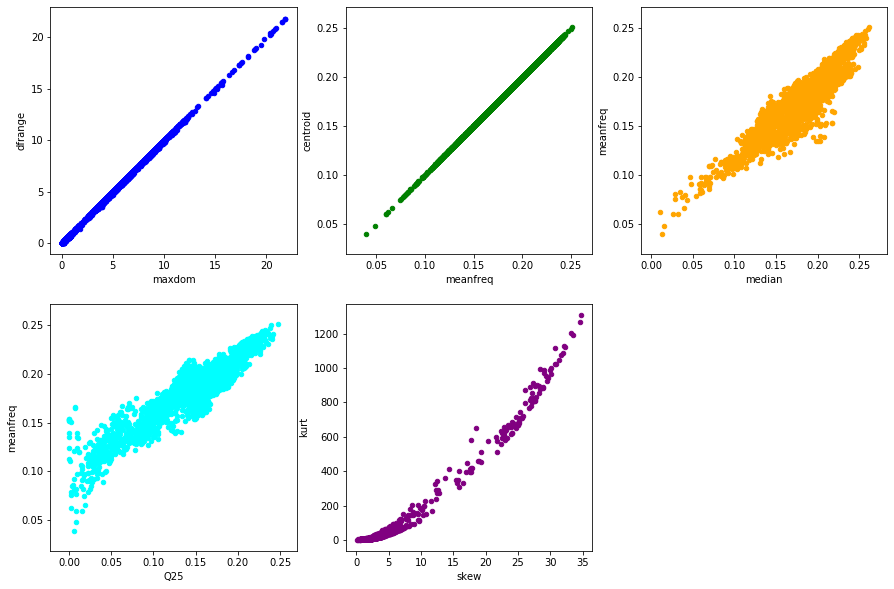

In [5]:
f,axes = plt.subplots(2,3, figsize=(15,10),sharex=False)  #2 rows, 3 columns
df.plot.scatter(x='maxdom', y='dfrange', c='Blue', ax=axes[0,0])
df.plot.scatter(x='meanfreq', y='centroid', c='Green', ax=axes[0,1])
df.plot.scatter(x='median', y='meanfreq', c='Orange', ax=axes[0,2])


df.plot.scatter(x='Q25', y='meanfreq', c='Cyan', ax=axes[1,0])
df.plot.scatter(x='skew', y='kurt', c='Purple', ax=axes[1,1])

f.delaxes(axes[1][2])  #deletes the empty exes at 1,2


**Observation:** As we could see from the above scatter plots, there is a high correlation among the below variables:

1. dfrange and maxdom
2. centroid and meanfreq
3. meanfreq and median
4. meanfreq and Q25
5. kurt and skew

Hence let us remove the columns maxdom, meanfreq, median, Q25 and skew

In [6]:
df_bkp = df.copy()
df.drop(['maxdom','meanfreq','median','Q25','skew'],axis=1,inplace=True)

In [24]:
df.shape

(3168, 16)

***Let us find skewness in data (that is outside -1 to 1 range) ***

In [7]:
for col in df.columns:
    if col != 'label':
        if (df[col].skew() < -1) or (df[col].skew() > 1):
            print ('Skewness of ',col, ' = ',df[col].skew())           

Skewness of  kurt  =  5.872586434587804
Skewness of  minfun  =  1.878003958251131
Skewness of  maxfun  =  -2.2385347709599523
Skewness of  mindom  =  1.6611137829753382
Skewness of  modindx  =  2.0643345777700124


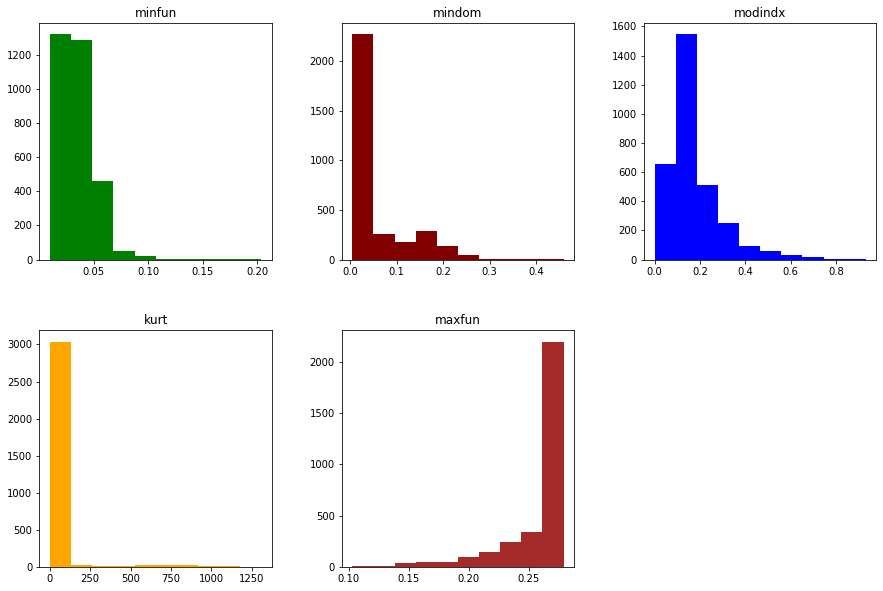

In [8]:
f,axes = plt.subplots(2,3, figsize=(15,10),sharex=False)  #2 rows, 2 columns

df.hist(column='minfun',color='Green',grid=False,ax=axes[0,0])
df.hist(column='mindom', color='Maroon',grid=False,ax=axes[0,1]) 
df.hist(column='modindx',color='Blue',grid=False,ax=axes[0,2])
df.hist(column='kurt',  color='Orange',grid=False,ax=axes[1,0])
df.hist(column='maxfun',color='Brown',grid=False,ax=axes[1,1])

f.delaxes(axes[1][2])   #deletes the unused axes at 1,2

**Observations:**

Of the 5 columns which has a skewness value outside -1 to 1 range, "minfun", "mindom", "modindx" and "kurt" are right skewed, while "maxfun" is left skewed.

In [20]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


**Check outliers in data**

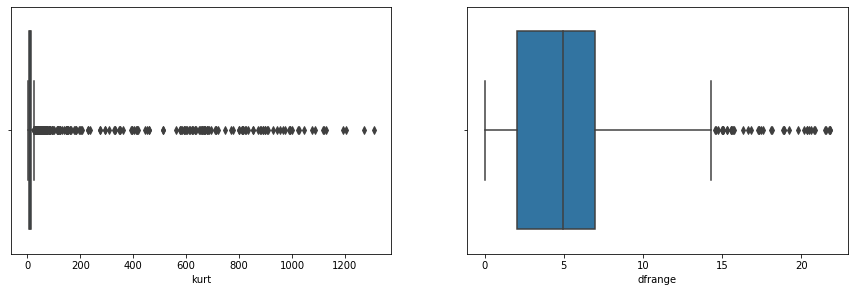

In [9]:
f,axes = plt.subplots(2,2, figsize=(15,10),sharex=False)  #2 rows, 2 columns
sns.boxplot(x=df["kurt"],orient="h",ax=axes[0,0])
sns.boxplot(x=df["dfrange"],orient="h",ax=axes[0,1])
f.delaxes(axes[1][0])   #deletes the unused axes at 1,2
f.delaxes(axes[1][1])   #deletes the unused axes at 1,2

**Observations:**

1. Outliers are high in "kurt" columns while "dfrange" have moderate outliers.

**Check and remove duplicate records**:

In [10]:
df[df.duplicated(keep = False)]

,sd,Q75,IQR,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,dfrange,modindx,label
232,0.057705,0.257984,0.116283,7.890927,0.859712,0.084934,0.248978,0.213732,0.133667,0.028319,0.253968,0.818125,0.132812,4.031250,0.229051,male
298,0.057705,0.257984,0.116283,7.890927,0.859712,0.084934,0.248978,0.213732,0.133667,0.028319,0.253968,0.818125,0.132812,4.031250,0.229051,male
2393,0.043190,0.245644,0.056687,6.109790,0.877669,0.314398,0.188957,0.212190,0.139942,0.047198,0.279070,1.925551,0.023438,15.585938,0.121344,female
2403,0.043190,0.245644,0.056687,6.109790,0.877669,0.314398,0.188957,0.212190,0.139942,0.047198,0.279070,1.925551,0.023438,15.585938,0.121344,female


***Row numbers 232 and 298 are duplicate rows. Similarly 2393 and 2403 are duplicate.  Hence, we will keep the first occuring row and remove the rest***

In [11]:
df = df.drop_duplicates(subset=None, keep='first', inplace=False)

**Let us check whether Class is Balanced**

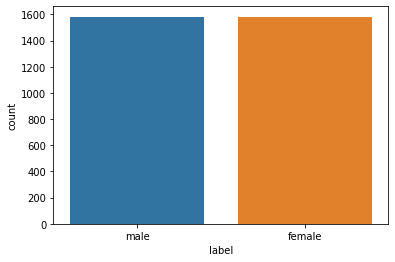

In [12]:
sns.countplot(x ='label', data = df)

**Observation:**

1. The class is well balanced with male and female the same.

<a id="section4"></a>

## 4. Preprocessing

**Since the Target Variable "label" is alphanumeric, this needs to be converted to numeric for the model to process.
We wil use LabelEncoder to convert to Numeric.**

In [13]:
df_original = df.copy()

In [14]:
le = preprocessing.LabelEncoder()
df['label'] = le.fit_transform(df['label'])

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
le.classes_

array(['female', 'male'], dtype=object)

In [16]:
df_original[df_original['label']=='male'].head(1)

,sd,Q75,IQR,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,dfrange,modindx,label
0,0.064241,0.090193,0.075122,274.402906,0.893369,0.491918,0.0,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.0,0.0,male


In [17]:
df[df['label']==1].head(1)

,sd,Q75,IQR,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,dfrange,modindx,label
0,0.064241,0.090193,0.075122,274.402906,0.893369,0.491918,0.0,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.0,0.0,1


In [18]:
df_original[df_original['label']=='female'].head(1)

,sd,Q75,IQR,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,dfrange,modindx,label
1584,0.082782,0.224552,0.162202,19.929617,0.952161,0.679223,0.049926,0.158108,0.185042,0.023022,0.275862,0.272964,0.046875,0.695312,0.339888,female


In [19]:
df[df['label']==0].head(1)

,sd,Q75,IQR,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,dfrange,modindx,label
1584,0.082782,0.224552,0.162202,19.929617,0.952161,0.679223,0.049926,0.158108,0.185042,0.023022,0.275862,0.272964,0.046875,0.695312,0.339888,0


**Note :** Label encoding has converted the values in the Label column as follows:

female = 0 <br>
male = 1


In [20]:
dfb4log = df.copy()

In [21]:
X = df.loc[:,df.columns != 'label']
y = df.loc[:,df.columns == 'label']

In [22]:
X = X.replace(0, np.NaN)

**Let us apply log transformation to check if the skew is better**

In [24]:
X_log = np.log(X)

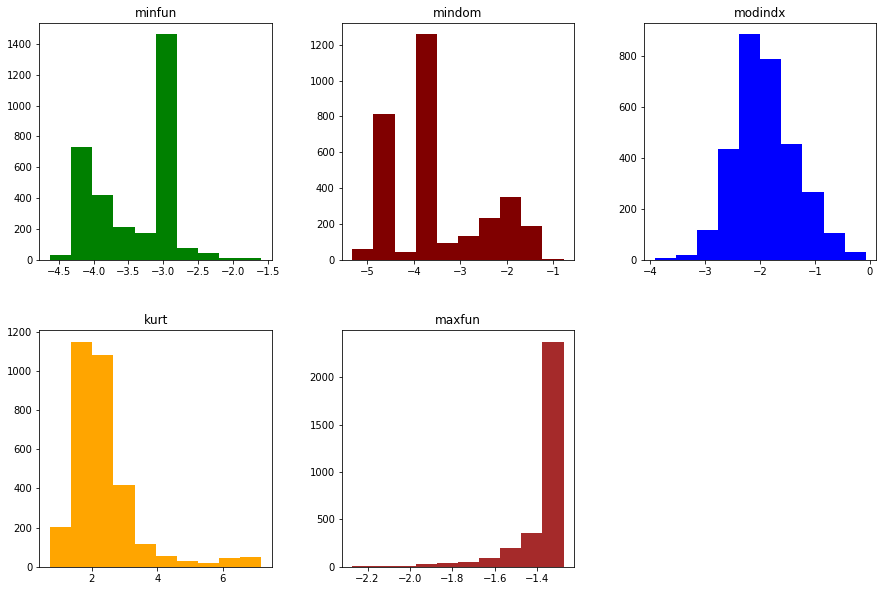

In [25]:
f,axes = plt.subplots(2,3, figsize=(15,10),sharex=False)  #2 rows, 2 columns

X_log.hist(column='minfun',color='Green',grid=False,ax=axes[0,0])
X_log.hist(column='mindom', color='Maroon',grid=False,ax=axes[0,1]) 
X_log.hist(column='modindx',color='Blue',grid=False,ax=axes[0,2])
X_log.hist(column='kurt',  color='Orange',grid=False,ax=axes[1,0])
X_log.hist(column='maxfun',color='Brown',grid=False,ax=axes[1,1])

f.delaxes(axes[1][2])   #deletes the unused axes at 1,2

**Observation**

1. "modindx" is more or less normally distributed
2. Skewness is slightly better for "minfun", "mindom" and "kurt".
3. There is no change to "maxfun".

In [26]:
X_logbkp = X_log.copy()


In [27]:
X_log =  X_log.replace(np.NaN, 0)


<a id="section5"></a>

## 5. Perform Train-Test Split

**Let us do a Train-Test split**

However, it is important to normalize AFTER splitting data. If you normalize before splitting, the mean and standard deviation used to normalize the data will be based on the full dataset and not the training subset — therefore leaking information from train set into the test set.



In [28]:
#Create final dataset that can be used for all models
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_log, y, test_size=0.20, random_state=42)

In [29]:
y_testarr = y_test.copy()
y_testarr = y_testarr.to_numpy()
y_testarr = y_testarr.ravel()

y_trainarr = y_train.copy()
y_trainarr = y_trainarr.to_numpy()
y_trainarr = y_trainarr.ravel()

## 6. Perform Scaling

**Common Function to standardize the Train and Test data set**

**Let us scale the Exploratory Variables, so all the variables are brought as the same unit**

In [30]:
from sklearn.preprocessing import StandardScaler #from sklearn.preprocessing, import MinMaxScaler, StandardScaler, RobustScaler
def convertscale(X):
  standardized = StandardScaler()
  standardized.fit(X)
  return standardized.transform(X)

In [31]:
X_train_scaled = convertscale(X_train)
X_test_scaled = convertscale(X_test)

In [35]:
print(X_train_scaled.shape)
print(y_train.shape)

(2532, 15)
(2532, 1)


In [36]:
print(X_test_scaled.shape)
print(y_test.shape)

(634, 15)
(634, 1)


<a id="section7"></a>

## 7. Models - SVC, LogisticRegression, Gaussian Naive Bayes

In [32]:
# COMMON FUNCTION TO DERIEVE CONFUSION MATRIX

def conf_mat(y_test,y_predict,model): 
    con_mat = pd.DataFrame(confusion_matrix(y_test, y_predict))
    con_mat.index = ['Actual Female','Actual Male']
    con_mat.columns = ['Predicted Female','Predicted Male']
    print('Confusion Matrix for Model ', model)
    print(con_mat)
    print ()

**Common Function to find out the accuracy of each model**

In [33]:
# This method is called from "callpredictmodel()"
#  parameter "predictTrain" will receive either of the values "Train" and "Test"
#  parameter "confmat" will receive either "Y" or "N". If "Y", then to print Confusion Matrix

def predictmodel(model, XTrain, XTest, YTrain, Ytest, predictTrain, confmat):

  mod = model
  mod.fit(XTrain, YTrain)

  if predictTrain == 'Train':
    Ypred = mod.predict(XTrain)
    return metrics.accuracy_score(YTrain, Ypred)
  else:
    Ypred = mod.predict(XTest)
    if confmat == 'Y':
        conf_mat(Ytest, Ypred, mod)
    else:
        return metrics.accuracy_score(Ytest, Ypred)
    


**Function to call "predictmodel()" function to pass different models with Train and Test data**


In [49]:
def callpredictmodel():
  for i in range(1,7):
    #i = 1 - Train data prediction for SVC
    #i = 2 - Test data prediction for SVC
    #i = 3 - Train data prediction for LogisticRegression
    #i = 4 - Test data prediction for LogisticRegression
    #i = 5 - Train data prediction for GaussianNB
    #i = 6 - Test data prediction for GaussianNB

    if i <= 2:
      model = SVC()
      modelname = 'SVC'
    elif i <= 4:
      model = LogisticRegression()
      modelname = 'LogisticRegression'
    else:
      model = GaussianNB()
      modelname = 'GaussianNB'

    if i % 2 == 1: #All old values of "i" is for predicting Train data and even values for predicting Test data
      traintest = 'Train'
      confmat = 'N'
    else:
      traintest = 'Test '  
      confmat = 'Y'
    
    %time
    accscore = predictmodel(model, X_train_scaled, X_test_scaled, y_trainarr,  y_testarr, traintest,'N')

    print (traintest, 'Accuracy Score of ', modelname, ' = ', accscore)
    print ()
    
    if i % 2 == 0:
        predictmodel(model, X_train_scaled, X_test_scaled, y_trainarr,  y_testarr, traintest,'Y')



In [50]:
callpredictmodel()

Wall time: 0 ns
Train Accuracy Score of  SVC  =  0.9881516587677726

Wall time: 0 ns
Test  Accuracy Score of  SVC  =  0.9794952681388013

Confusion Matrix for Model  SVC()
               Predicted Female  Predicted Male
Actual Female               297               5
Actual Male                   8             324

Wall time: 0 ns
Train Accuracy Score of  LogisticRegression  =  0.9766982622432859

Wall time: 0 ns
Test  Accuracy Score of  LogisticRegression  =  0.9794952681388013

Confusion Matrix for Model  LogisticRegression()
               Predicted Female  Predicted Male
Actual Female               293               9
Actual Male                   4             328

Wall time: 0 ns
Train Accuracy Score of  GaussianNB  =  0.9182464454976303

Wall time: 0 ns
Test  Accuracy Score of  GaussianNB  =  0.9242902208201893

Confusion Matrix for Model  GaussianNB()
               Predicted Female  Predicted Male
Actual Female               267              35
Actual Male                  13 

**Observation:**

SVC and LogR gives a slightly better accuracy over Naive Bayes. <br>
In all these models the test accuracy score is high by a very small value (0.01)

**Confusion Matrix for SVC**

Total number of True Predictions = **TN + TP = 297 + 324 = 621** Total number of **False Predictions = FN + FP = 8 + 5 = 13**

**Confusion Matrix for Logistic Regression**

Total number of True Predictions = **TN + TP = 293 + 328 = 621** Total number of **False Predictions = FN + FP = 4 + 9 = 13**

**Confusion Matrix for GaussianNB**

Total number of True Predictions = **TN + TP = 267 + 319 = 586** Total number of **False Predictions = FN + FP = 13 + 35 = 48**



In [37]:
y_testarr = y_test.copy()
y_testarr = y_testarr.to_numpy()
y_testarr = y_testarr.ravel()

y_trainarr = y_train.copy()
y_trainarr = y_trainarr.to_numpy()
y_trainarr = y_trainarr.ravel()

<a id=section8></a>

## 8. Support Vector Machine using RBF Kernel

In [38]:
# Kernel 

from sklearn.model_selection import cross_val_score

X_train_scaled = convertscale(X_train)
X_test_scaled = convertscale(X_test)

y_train, y_test


svc = SVC(kernel='rbf',random_state = 0)

for i in range (2,12):
  score = cross_val_score(svc, X_train_scaled, y_trainarr, cv=i, scoring='accuracy')

print('Accuracy score of Train Dataset using SVC - RBF using 10 Fold Cross Validation :',score.mean())


for i in range (2,12):
  score = cross_val_score(svc, X_test_scaled, y_testarr, cv=i, scoring='accuracy')

print('Accuracy score of Test Dataset using SVC - RBF using 10 Fold Cross Validation :',score.mean())



Accuracy score of Train Dataset using SVC - RBF using 10 Fold Cross Validation : 0.9822288383553205
Accuracy score of Test Dataset using SVC - RBF using 10 Fold Cross Validation : 0.9669471484353518


**Observation:**
The accuracy score of SVC using RBF Kernel produces the same accuracy as that without RBF Kernel.

<a id=section9></a>

## 9. K-Nearest Neighbors

In [39]:

from sklearn.neighbors import KNeighborsClassifier
knn_model1 = KNeighborsClassifier(n_neighbors = 3)
knn_model1.fit(X_train_scaled, y_trainarr)
pred_i = knn_model1.predict(X_test_scaled)
print ('Accuracy score of KNN Algo with 3 Neighbours = ',metrics.accuracy_score(y_testarr, pred_i))
print()

conf_mat(y_testarr,pred_i,'KNN')

Accuracy score of KNN Algo with 3 Neighbours =  0.9747634069400631

Confusion Matrix for Model  KNN
               Predicted Female  Predicted Male
Actual Female               294               8
Actual Male                   8             324



**Observation:**

Number of True Predictions: **TN + TP = 294 + 324 = 618**, Number of False Predictions : **FN + FP = 8 + 8 = 16**

In [40]:
import numpy as np
from sklearn.metrics import accuracy_score
accuracy_list = []
def generate():
    for i in range(1,30):
        knn_model_ = KNeighborsClassifier(n_neighbors = i)
        knn_model_.fit(X_train_scaled, y_trainarr)
        pred_i = knn_model_.predict(X_test_scaled)
        accuracy_list.append(accuracy_score(y_testarr, pred_i))
    
    print("Maximum accuracy and the corresponding value of k is",
          max([(v,i+1) for i,v in enumerate(accuracy_list)]),'respectively.')

generate() 

Maximum accuracy and the corresponding value of k is (0.9747634069400631, 3) respectively.


**Observation:**

KNN neigbour algo with **3** neighbours gives a maximum accuracy of **0.9747634069400631**

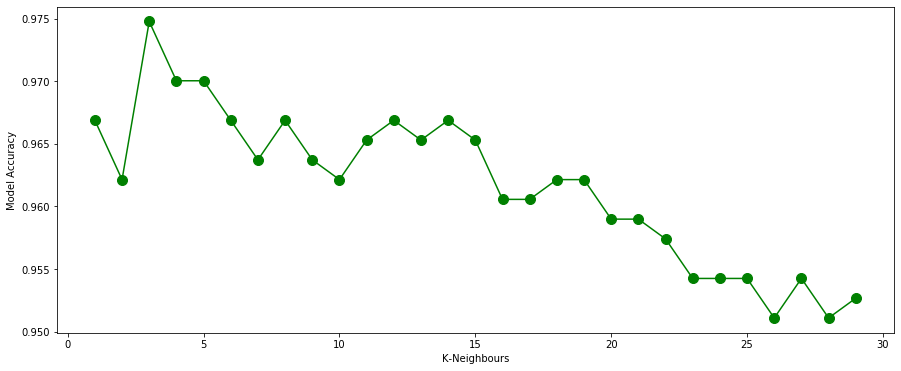

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
def generate():
    plt.figure(figsize=(15,6))
    plt.plot(range(1,30),accuracy_list,color='green',linestyle='solid',marker='o', markerfacecolor='green', markersize='10')
    plt.xlabel('K-Neighbours')
    plt.ylabel('Model Accuracy')
    plt.show()
generate()

**Observation:**<br>
We can see Maximum accuracy of 0.974 when the value of K is 3. After 15 neighbours, there is a sharp decline in accuracy score

<a id=section10></a>

## 10. Conclusion


Using the given data, the following models has the following accuracy scores: <br>

    SVC                  : 0.9794952681388013  
    Logistic Regression  : 0.9794952681388013 
    KNN                  : 0.9747634069400631 
    Gaussian Naive Bayes : 0.9242902208201893 

The number of True Predictions and False Predictions for each model are as given below:

                    True Predictions    False Predictions
     SVC                    621                  13
     LogR                   621                  13
     KNN                    618                  16
     Gausian Naive Bayes    586                  48

 
**SVC and Logistic Regression gives exactly the same accuracy scores, predictions and with the same wall time. Hence in this case, can choose Logistic Regression over SVC for its explainability**
